In [2]:
import numpy as np
import os 
from pathlib import Path
from typing import List, Dict, Union
import glob
from matplotlib.patches import Polygon

PathLike = Union[Path, str]
import json
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from dataset import get_paths, PathLike
from pycocotools.coco import COCO
import pandas as pd
import json

In [3]:
list_path_to_annotations = list(filter( lambda x: True if x.split('.')[-1] == 'json' else False, get_paths('../../dataset/annotation/')))
len(list_path_to_annotations)
list_path_to_annotations

['../../dataset/annotation/pits_stones_detections_300920/instances_default.json',
 '../../dataset/annotation/asbestos_stone_161220/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_020221/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_161120/instances_default.json',
 '../../dataset/annotation/open-pit-zoomed-161120/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_161220/instances_default.json',
 '../../dataset/annotation/test transport/annotations/instances_default.json',
 '../../dataset/annotation/asbestos_stone_020221/instances_default.json',
 '../../dataset/annotation/asbest_stones_111121/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_111121/instances_default.json']

In [330]:
coco = COCO(list_path_to_annotations[5])
print(len(coco.anns), len(coco.imgs))
image_names = coco.imgs

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
1382 20


In [331]:
frame = pd.DataFrame({d['id']: d for d in json.load(open(list_path_to_annotations[5],'r'))['annotations']}).T
frame

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
1,1,1,1,"[[1887.52, 1901.07, 1877.18, 1862.02, 1877.18,...",11775.0,"[1877.18, 1794.26, 169.97, 112.55]",0,{'occluded': False}
2,2,1,1,"[[1848.47, 1771.29, 1864.55, 1751.77, 1901.3, ...",11800.0,"[1848.47, 1740.29, 186.05, 106.8]",0,{'occluded': False}
3,3,1,1,"[[1807.78, 1581.15, 1811.1, 1569.85, 1823.73, ...",16225.0,"[1797.59, 1564.54, 173.02, 148.53]",0,{'occluded': False}
4,4,1,1,"[[1232.53, 1607.68, 1248.18, 1587.2, 1288.15, ...",8112.0,"[1232.53, 1580.31, 114.88, 112.09]",0,{'occluded': False}
5,5,1,1,"[[1768.29, 731.8, 1779.31, 773.14, 1793.09, 80...",6889.0,"[1768.29, 730.42, 130.92, 100.6]",0,{'occluded': False}
...,...,...,...,...,...,...,...,...
1378,1378,20,1,"[[2331.48, 742.25, 2372.09, 730.51, 2370.29, 6...",9645.0,"[2239.43, 632.14, 132.66, 110.11]",0,{'occluded': False}
1379,1379,20,1,"[[863.33, 1063.37, 856.56, 1044.57, 863.33, 10...",12241.0,"[738.49, 976.13, 124.84, 119.58]",0,{'occluded': False}
1380,1380,20,1,"[[715.32, 1039.23, 733.37, 1015.16, 765.71, 98...",13249.0,"[617.56, 912.13, 148.15, 127.1]",0,{'occluded': False}
1381,1381,20,1,"[[227.84, 1503.32, 227.84, 1468.73, 279.73, 14...",21288.0,"[126.32, 1316.1, 189.51, 187.22]",0,{'occluded': False}


In [ ]:
from typing import List, Union

def image_segmentation_from_frame(frame: pd.DataFrame, img_id: int, category_id:int, images):
    maska = (frame.image_id == img_id) & (frame.category_id == category_id)
    h_img = images[img_id]['height']
    w_img = images[img_id]['width']
    return [{category_id: normalize_segment(np.array(list(s[0])), h_img, w_img)} for s in frame[maska].segmentation]

def normalize_segment(segment, h_img, w_img):
    segment[::2] /=w_img
    segment[1::2]/=h_img
    return segment

p
            
img_id = 13
s = image_segmentation_from_frame(frame, img_id, 1, image_names)
save_segmentation(s,image_names[img_id]['file_name'].split('.')[-2] + '.txt')

In [332]:
out_path = Path('/home/kirilman/Project/dataset/segmentation/seg/')

In [ ]:
for k, v in image_names.items():
    if isinstance(v, dict):
        img_id = v['id']
        segments = image_segmentation_from_frame(frame, img_id, 1,image_names)
        filename = out_path \ v['file_name'].split('.')[-2] + '.txt'
        save_segmentation(segments, filename)

In [ ]:
arr_segment = np.array(segments[0][1])
arr_segment[::2] = arr_segment[::2]/

In [ ]:
count_images = 0
for path_2_anno in list_path_to_annotations:
    coco = COCO(path_2_anno)
    count_images+=len(coco.imgs)
    print(len(coco.anns), len(coco.imgs))
    image_names = coco.imgs
    for k, image in image_names.items():
        if isinstance(image, dict):
            img_id = image['id']
            segments = image_segmentation_from_frame(frame, img_id, 1,image_names)
            filename = str(out_path / image['file_name'].split('/')[-1].split('.')[-2]) + '.txt'
            # save_segmentation(segments, filename)
            print(path_2_anno + image['file_name'])

In [335]:
sys.path.append('/home/kirilman/Project/asbestos/dataset')
from dataset import is_image
from dataset.processor import JsonSegmentProcessing
import shutil

In [343]:
!rm -r /home/kirilman/Project/dataset/segmentation/seg/*.txt

In [344]:
list_path_to_annotations

['../../dataset/annotation/pits_stones_detections_300920/instances_default.json',
 '../../dataset/annotation/asbestos_stone_161220/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_020221/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_161120/instances_default.json',
 '../../dataset/annotation/open-pit-zoomed-161120/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_161220/instances_default.json',
 '../../dataset/annotation/test transport/annotations/instances_default.json',
 '../../dataset/annotation/asbestos_stone_020221/instances_default.json',
 '../../dataset/annotation/asbest_stones_111121/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_111121/instances_default.json']

In [345]:
s = 0
unused = ['../../dataset/annotation/open-pit-zoomed-161120/instances_default.json', '../../dataset/annotation/pits_stones_detections_161220/instances_default.json']
for p in list_path_to_annotations:
    if p in unused:
        print(p)
        continue
    proccesor = JsonSegmentProcessing(p, 1, '/home/kirilman/Project/dataset/segmentation/seg/')
    proccesor.process() 

../../dataset/annotation/open-pit-zoomed-161120/instances_default.json
../../dataset/annotation/pits_stones_detections_161220/instances_default.json


In [358]:
print('Количество меток:', 
len(list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, os.listdir('/home/kirilman/Project/dataset/segmentation/seg/')))) )

Количество меток: 350


In [363]:
print(unused)
for p in unused:
    proccesor = JsonSegmentProcessing(p,
                                  1, '/home/kirilman/Project/dataset/segmentation/test/')
    proccesor.process()

['../../dataset/annotation/open-pit-zoomed-161120/instances_default.json', '../../dataset/annotation/pits_stones_detections_161220/instances_default.json']


In [361]:
image_files = list(filter( lambda x: True if x.split('.')[-1] != 'txt' else False, get_paths('../../dataset/segmentation/seg/')))
label_files = list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, get_paths('../../dataset/segmentation/seg/')))
images = {}
for image_file in image_files:
    for label in label_files:
        if image_file.split('.')[-2] in label:
            images[label] = image_file
len(images)

350

In [362]:
root_path = Path('/home/kirilman/Project/dataset/segmentation/')
count = len(label_files)
print(count, count*0.1)
val_index = np.random.choice(label_files,35)

for f_label, f_image in images.items():
    if f_label in val_index:
        shutil.copy(f_label, root_path / 'val' / Path(f_label).name)
        shutil.copy(f_image, root_path / 'val' / Path(f_image).name)
    else:
        shutil.copy(f_label, root_path / 'train' / Path(f_label).name)
        shutil.copy(f_image, root_path / 'train' / Path(f_image).name)

350 35.0


In [ ]:
for root in unused:
    for f in os.listdir(Path(root).parent):
        save_path = Path('/home/kirilman/Project/dataset/segmentation/test') / f.name
        shutil.copy(Path(root) + Path(f).name, save_path)

In [383]:
unused

['../../dataset/annotation/open-pit-zoomed-161120/instances_default.json',
 '../../dataset/annotation/pits_stones_detections_161220/instances_default.json']

In [7]:
from dataset.preprossesing import resize_images
import cv2

### Merge annotation from train and prediction-segment

In [325]:
train_files = list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, get_paths('../../dataset/segmentation/merge/train/')))
predict_file = list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, get_paths('../yolov5/runs/predict-seg/exp4/labels')))
print(len(train_files), len(predict_file))

318 318


In [286]:
train_files = list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, get_paths('../../dataset/segmentation/merge/val/')))
predict_file = list(filter( lambda x: True if x.split('.')[-1] == 'txt' else False, get_paths('../yolov5/runs/predict-seg/exp5/')))
print(len(train_files), len(predict_file))

32 32


In [326]:
labels = []
for train, pred in zip(train_files, predict_file):
    # print(train, pred)
    with open(train, 'a') as f_train:
        with open(pred, 'r') as f_pred:
            labels = f_pred.readlines()
            for label in labels:
                arr_label = np.fromstring(label, sep = ' ')
                arr_label[1:] = arr_label[1:]/1024
        
                f_train.write(to_string(arr_label))
                            

43


(0.0, 1.0)

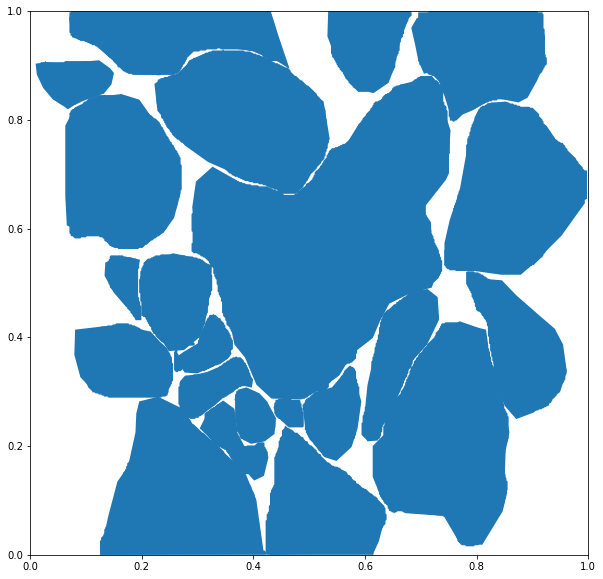

In [280]:
with open('../../dataset/segmentation/merge/1_12_09_40_05-03-2020_1.txt', 'r') as f:
    labels = f.readlines()
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

# polygon1 = Polygon([(0,1), (1,1), (3,0),])

fig, ax = plt.subplots(1,1, figsize = (10,10))
for i,label in enumerate(labels):
    label = np.fromstring(label, sep=' ')[1:]
    polygon1 = Polygon([(x,y) for x,y in zip(label[0::2],label[1::2])])
    polygon1
    ax.add_patch(polygon1)
print(i)   
plt.ylim(0,1)
plt.xlim(0,1)

100


(0.0, 1.0)

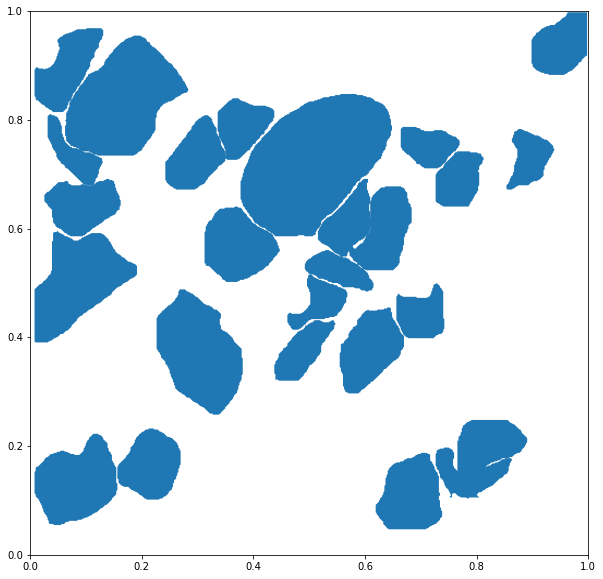

In [155]:
with open('../yolov5/runs/predict-seg/exp4/labels/637412006957367334.txt', 'r') as f:
    labels = f.readlines()
    
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

# polygon1 = Polygon([(0,1), (1,1), (3,0),])

fig, ax = plt.subplots(1,1, figsize = (10,10))
for i,label in enumerate(labels):
    label = np.fromstring(label, sep=' ')[1:]/1024
    polygon1 = Polygon([(x,y) for x,y in zip(label[0::2],label[1::2])])
    area = sPolygon([(x,y) for x,y in zip(label[0::2],label[1::2])]).area
    if area > 0.005:
        ax.add_patch(polygon1)
    # if area > 0.00:
    #     ax.add_patch(polygon1)
print(i)   
plt.ylim(0,1)
plt.xlim(0,1)

### Segmentation filter, squre analyse

In [10]:
from shapely.geometry import Polygon as sPolygon
from dataset.path_utils import get_paths_from_dirs
from dataset.processor import SegmentSquareFilter
# !pip install shapely
sPolygon([(0,0),(2,0),(1,1), (0,2)]).area

2.0

9487 0.01745830167228839 0.004327205


(0.01, 0.4)

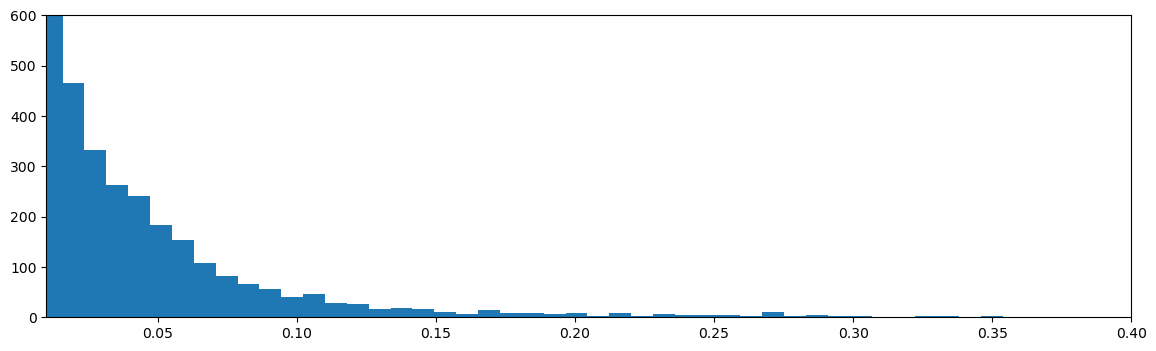

In [11]:
def read_segmentation_labels(p: PathLike):
    with open(p, 'r') as f:
        lines = f.readlines()
        return [np.fromstring(line, sep=' ') for line in lines]

files = get_paths_from_dirs(['../../dataset/segmentation/train/'], ['txt'])
areas = []

for f in files:
    labels = read_segmentation_labels(f)
    for label in labels:
        mask = label[1:]
        p = sPolygon([(x,y) for x,y in zip(mask[0::2], mask[1::2])] )
        areas+=[p.area]
areas = np.array(areas)

print(len(areas), areas.mean(), np.median(areas))
fig = plt.figure(figsize=(14,4),dpi = 100)
plt.hist(areas,60);
plt.ylim(0,600)
plt.xlim(0.01,0.4)

In [12]:
seg = SegmentSquareFilter(files[12], './test/', 0.005)
seg.process()

'15_14_00_15_05-03-2020_1.txt'